# PSMs: phosphate solubilizing microorganisms

__Inputs: would be temperature, the various ingredients present in their growth media, PH levels, etc. <br>
Output: would be how much phosphate these organisms solubilised.__

- PVK: Pilovskaya medium
- NBRIP: National Botanical Research Institute's phosphate growth medium


* Phosphate sources (tricalcium, dicalcium, ferric and aluminium phosphates, and bone meal)<br>
* Carbon sources (glucose, mannitol, fructose, sucrose, xylose, and sorbitol)<br>
* Nitrogen sources (ammonium sulfate, ammonium chloride, ammonium nitrate, sodium nitrate, potassium nitrate, and urea)

. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("PSMs_data.xlsx")
df

,culture_media,bacteria,bacteria_type,pH,temperature,sources,incubation_period,phosphate_solubilization,Reference
0,PVK,Pseudomonas fluorescens,Pseudomonas fluorescens,4.10,NaN,NaN,NaN,390.00,Optimization of inorganic phosphate solubiliza...
1,AYG,Pseudomonas fluorescens,Pseudomonas fluorescens,4.25,NaN,NaN,NaN,90.00,Optimization of inorganic phosphate solubiliza...
2,NBRIY,Pseudomonas fluorescens,Pseudomonas fluorescens,4.55,NaN,NaN,NaN,140.00,Optimization of inorganic phosphate solubiliza...
3,NBRIP,Pseudomonas fluorescens,Pseudomonas fluorescens,3.25,NaN,NaN,NaN,650.00,Optimization of inorganic phosphate solubiliza...
4,PVK,Bacillus sp.,Bacillus sp.,5.75,NaN,NaN,NaN,390.00,Optimization of inorganic phosphate solubiliza...
...,...,...,...,...,...,...,...,...,...
200,PVK,Pseudomonas sp.,Pseudomonas sp.,7.00,35.0,NaN,9.0,245.65,Optimization of soluble phosphate and IAA prod...
201,PVK,Pseudomonas sp.,Pseudomonas sp.,8.00,40.0,NaN,12.0,211.91,Optimization of soluble phosphate and IAA prod...
202,PVK,Pseudomonas sp.,Pseudomonas sp.,6.00,40.0,NaN,6.0,221.16,Optimization of soluble phosphate and IAA prod...
203,PVK,Pseudomonas sp.,Pseudomonas sp.,7.00,35.0,NaN,9.0,249.71,Optimization of soluble phosphate and IAA prod...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   culture_media             205 non-null    object 
 1   bacteria                  205 non-null    object 
 2   bacteria_type             205 non-null    object 
 3   pH                        205 non-null    float64
 4   temperature               162 non-null    float64
 5   sources                   16 non-null     object 
 6   incubation_period         165 non-null    float64
 7   phosphate_solubilization  204 non-null    float64
 8   Reference                 205 non-null    object 
dtypes: float64(4), object(5)
memory usage: 14.5+ KB


In [4]:
medium = df['culture_media']
columns = ['culture_media', 'bacteria_type', 'pH', 'temperature', 'incubation_period', 'phosphate_solubilization']
df = df[columns]
df

,culture_media,bacteria_type,pH,temperature,incubation_period,phosphate_solubilization
0,PVK,Pseudomonas fluorescens,4.10,NaN,NaN,390.00
1,AYG,Pseudomonas fluorescens,4.25,NaN,NaN,90.00
2,NBRIY,Pseudomonas fluorescens,4.55,NaN,NaN,140.00
3,NBRIP,Pseudomonas fluorescens,3.25,NaN,NaN,650.00
4,PVK,Bacillus sp.,5.75,NaN,NaN,390.00
...,...,...,...,...,...,...
200,PVK,Pseudomonas sp.,7.00,35.0,9.0,245.65
201,PVK,Pseudomonas sp.,8.00,40.0,12.0,211.91
202,PVK,Pseudomonas sp.,6.00,40.0,6.0,221.16
203,PVK,Pseudomonas sp.,7.00,35.0,9.0,249.71


## Categorical Features into Numeric

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Initialize LabelEncoder
culture_encoder = LabelEncoder()
# Apply LabelEncoder to the categorical feature
df.loc[:, 'culture_media'] = culture_encoder.fit_transform(df['culture_media'])

# Initialize LabelEncoder
bact_encoder = LabelEncoder()
# Apply LabelEncoder to the categorical feature
df.loc[:, 'bacteria_type'] = bact_encoder.fit_transform(df['bacteria_type'])

df

,culture_media,bacteria_type,pH,temperature,incubation_period,phosphate_solubilization
0,4,66,4.10,NaN,NaN,390.00
1,0,66,4.25,NaN,NaN,90.00
2,3,66,4.55,NaN,NaN,140.00
3,1,66,3.25,NaN,NaN,650.00
4,4,9,5.75,NaN,NaN,390.00
...,...,...,...,...,...,...
200,4,67,7.00,35.0,9.0,245.65
201,4,67,8.00,40.0,12.0,211.91
202,4,67,6.00,40.0,6.0,221.16
203,4,67,7.00,35.0,9.0,249.71


In [7]:
df.describe()

,pH,temperature,incubation_period,phosphate_solubilization
count,205.000000,162.000000,165.000000,204.000000
mean,6.292927,28.888889,5.727273,253.426029
std,1.416486,6.498925,2.639668,188.434419
min,3.050000,20.000000,3.000000,0.500000
25%,5.100000,21.250000,4.000000,117.825000
50%,7.000000,30.000000,5.000000,201.475000
75%,7.500000,30.000000,6.000000,390.000000
max,9.000000,50.000000,15.000000,705.000000


## Handling Missing Values

In [8]:
# count missing values in each column
df.isnull().sum()

culture_media                0
bacteria_type                0
pH                           0
temperature                 43
incubation_period           40
phosphate_solubilization     1
dtype: int64

In [9]:
df.loc[:, 'phosphate_solubilization'] = df['phosphate_solubilization'].interpolate()

In [10]:
# count missing values in each column
df.isnull().sum()

culture_media                0
bacteria_type                0
pH                           0
temperature                 43
incubation_period           40
phosphate_solubilization     0
dtype: int64

In [11]:
#df = df.interpolate(axis=0)
# Mean Imputation
#df['temperature'].fillna(df['temperature'].mean(), inplace=True)
#df['incubation_period'].fillna(df['incubation_period'].mean(), inplace=True)
#df['phosphate_solubilization'].fillna(df['phosphate_solubilization'].mean(), inplace=True)
#df

In [12]:
df.loc[:, 'temperature_missing'] = df['temperature'].isnull().astype(int)
df.loc[:, 'incubation_period_missing'] = df['incubation_period'].isnull().astype(int)
df

/tmp/ipykernel_32080/2156731949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'temperature_missing'] = df['temperature'].isnull().astype(int)
/tmp/ipykernel_32080/2156731949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'incubation_period_missing'] = df['incubation_period'].isnull().astype(int)


,culture_media,bacteria_type,pH,temperature,incubation_period,phosphate_solubilization,temperature_missing,incubation_period_missing
0,4,66,4.10,NaN,NaN,390.00,1,1
1,0,66,4.25,NaN,NaN,90.00,1,1
2,3,66,4.55,NaN,NaN,140.00,1,1
3,1,66,3.25,NaN,NaN,650.00,1,1
4,4,9,5.75,NaN,NaN,390.00,1,1
...,...,...,...,...,...,...,...,...
200,4,67,7.00,35.0,9.0,245.65,0,0
201,4,67,8.00,40.0,12.0,211.91,0,0
202,4,67,6.00,40.0,6.0,221.16,0,0
203,4,67,7.00,35.0,9.0,249.71,0,0


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator

In [14]:
X = df.drop("phosphate_solubilization", axis=1)
y = df["phosphate_solubilization"]

In [15]:
X

,culture_media,bacteria_type,pH,temperature,incubation_period,temperature_missing,incubation_period_missing
0,4,66,4.10,NaN,NaN,1,1
1,0,66,4.25,NaN,NaN,1,1
2,3,66,4.55,NaN,NaN,1,1
3,1,66,3.25,NaN,NaN,1,1
4,4,9,5.75,NaN,NaN,1,1
...,...,...,...,...,...,...,...
200,4,67,7.00,35.0,9.0,0,0
201,4,67,8.00,40.0,12.0,0,0
202,4,67,6.00,40.0,6.0,0,0
203,4,67,7.00,35.0,9.0,0,0


In [16]:
imputer = KNNImputer(n_neighbors=3, weights='distance')
imputed_array = imputer.fit_transform(X = X, y = y)
imputed_array

array([[ 4.        , 66.        ,  4.1       , ...,  9.38730438,
         1.        ,  1.        ],
       [ 0.        , 66.        ,  4.25      , ...,  8.51765983,
         1.        ,  1.        ],
       [ 3.        , 66.        ,  4.55      , ...,  9.06201673,
         1.        ,  1.        ],
       ...,
       [ 4.        , 67.        ,  6.        , ...,  6.        ,
         0.        ,  0.        ],
       [ 4.        , 67.        ,  7.        , ...,  9.        ,
         0.        ,  0.        ],
       [ 4.        , 67.        ,  5.        , ...,  9.        ,
         0.        ,  0.        ]])

In [17]:
X_imputed = pd.DataFrame(imputed_array, columns = X.columns)
X_imputed = pd.concat([X_imputed, y], axis=1)
X_imputed

,culture_media,bacteria_type,pH,temperature,incubation_period,temperature_missing,incubation_period_missing,phosphate_solubilization
0,4.0,66.0,4.10,30.771942,9.387304,1.0,1.0,390.00
1,0.0,66.0,4.25,34.809064,8.517660,1.0,1.0,90.00
2,3.0,66.0,4.55,31.703999,9.062017,1.0,1.0,140.00
3,1.0,66.0,3.25,34.221545,8.929023,1.0,1.0,650.00
4,4.0,9.0,5.75,29.659128,7.092843,1.0,1.0,390.00
...,...,...,...,...,...,...,...,...
200,4.0,67.0,7.00,35.000000,9.000000,0.0,0.0,245.65
201,4.0,67.0,8.00,40.000000,12.000000,0.0,0.0,211.91
202,4.0,67.0,6.00,40.000000,6.000000,0.0,0.0,221.16
203,4.0,67.0,7.00,35.000000,9.000000,0.0,0.0,249.71


## pH vs Phosphate Solubilization Graphs

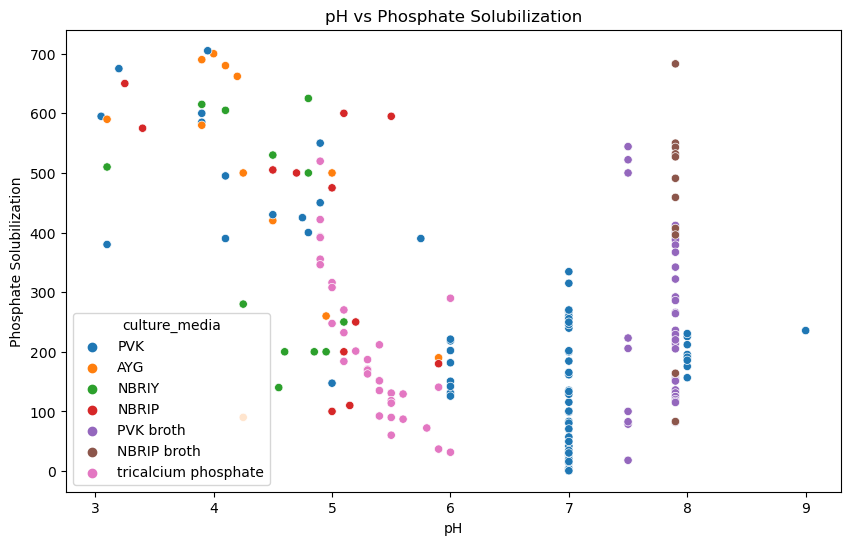

In [18]:
# Plot pH vs phosphate_solubilization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='phosphate_solubilization', data=X_imputed, hue=medium)
plt.title('pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


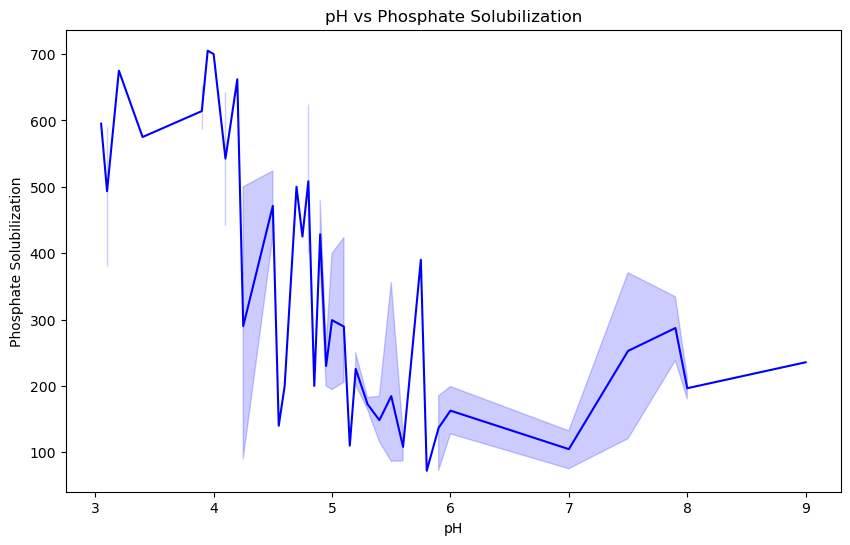

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='pH', y='phosphate_solubilization', data=X_imputed, color='blue')
plt.title('pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


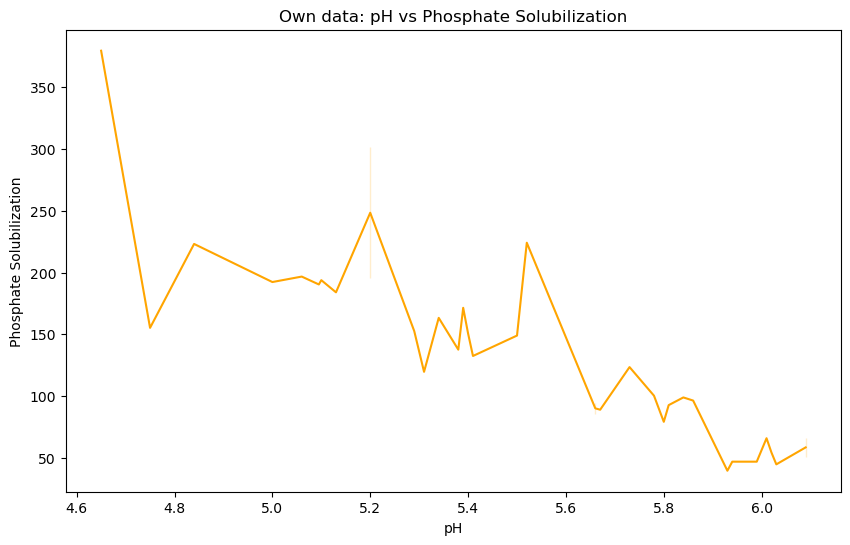

In [20]:
pH_data = [5.86, 5.94, 6.01, 5.52, 5.66, 5.73, 5.2, 5.31, 5.39, 4.65, 4.75, 4.84, 6.02, 5.99,
           6.09, 5.67, 5.8, 5.84, 5.34, 5.4, 5.29, 5.06, 5.13, 5.095, 6.09, 5.93, 6.03, 5.78,
           5.66, 5.81, 5.5, 5.41, 5.38, 5.2, 5.0, 5.1]
P_sol_data = [96.326, 46.852, 65.831, 224.126, 85.328, 123.432, 301.45, 119.593, 171.421, 379.5825,
              155.2, 223.135, 54.326, 46.852, 65.831, 88.921, 79.122, 98.862, 163.281, 150.64, 152.517,
              196.7125, 183.9575, 190.335, 50.978, 39.521, 44.678, 100.253, 94.737, 92.63, 148.953,
              132.431, 137.553, 195.34, 192.2925, 193.81625]

plt.figure(figsize=(10, 6))
sns.lineplot(x=pH_data, y=P_sol_data, color='orange')
plt.title('Own data: pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


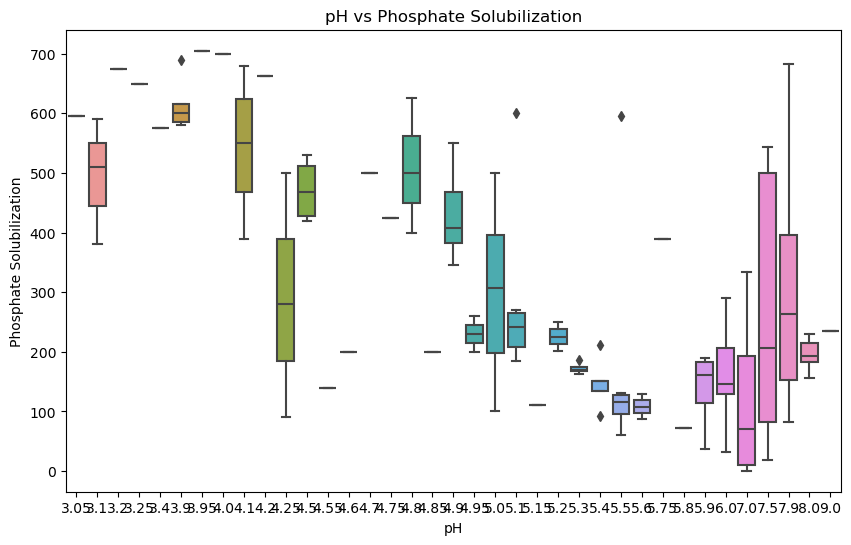

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pH', y='phosphate_solubilization', data=X_imputed)
plt.title('pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


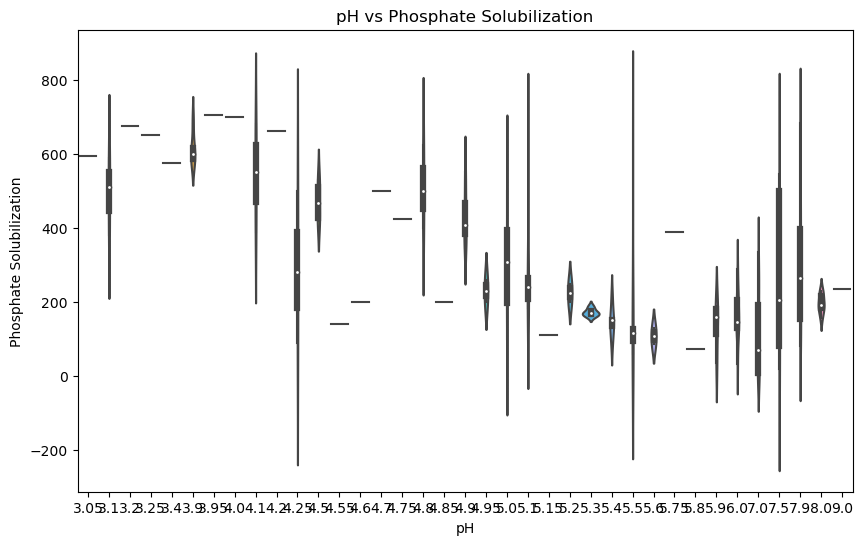

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='pH', y='phosphate_solubilization', data=X_imputed)
plt.title('pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

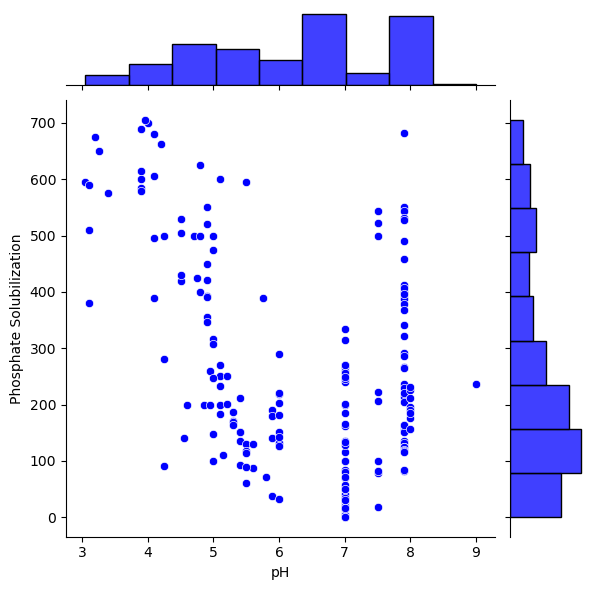

In [23]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='pH', y='phosphate_solubilization', data=X_imputed, kind='scatter', color='blue')
#plt.title('pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


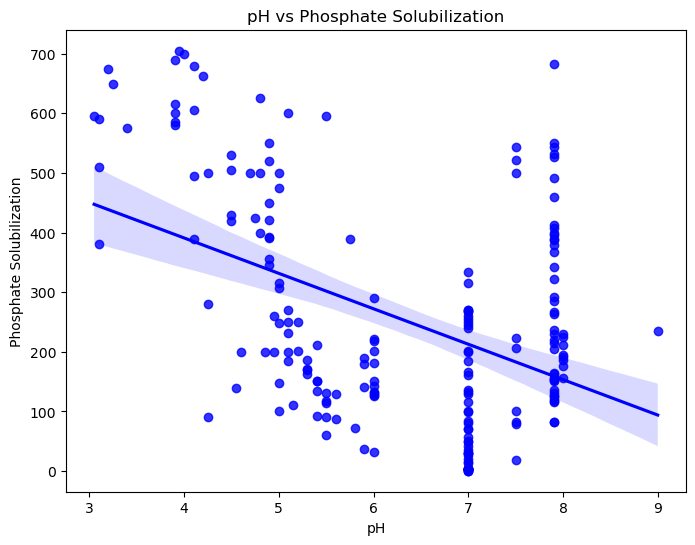

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(x='pH', y='phosphate_solubilization', data=X_imputed, color='blue')
plt.title('pH vs Phosphate Solubilization')
plt.xlabel('pH')
plt.ylabel('Phosphate Solubilization')
plt.show()


## Temperature vs Phosphate Solubilization Graphs

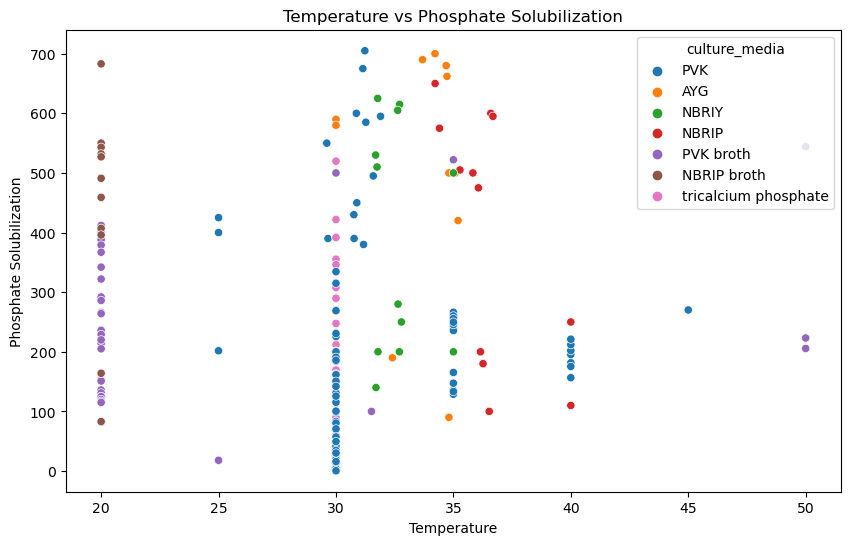

In [25]:
# Plot temperature vs phosphate_solubilization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='phosphate_solubilization', data=X_imputed, hue=medium)
plt.title('Temperature vs Phosphate Solubilization')
plt.xlabel('Temperature')
plt.ylabel('Phosphate Solubilization')
plt.show()


/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


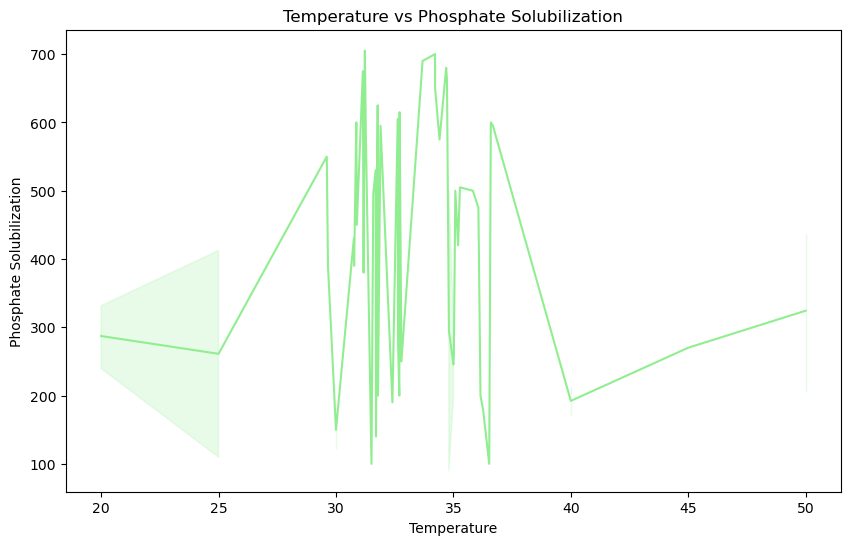

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature', y='phosphate_solubilization', data=X_imputed, color='lightgreen')
plt.title('Temperature vs Phosphate Solubilization')
plt.xlabel('Temperature')
plt.ylabel('Phosphate Solubilization')
plt.show()


## Incubation Period vs Phosphate Solubilization Graphs

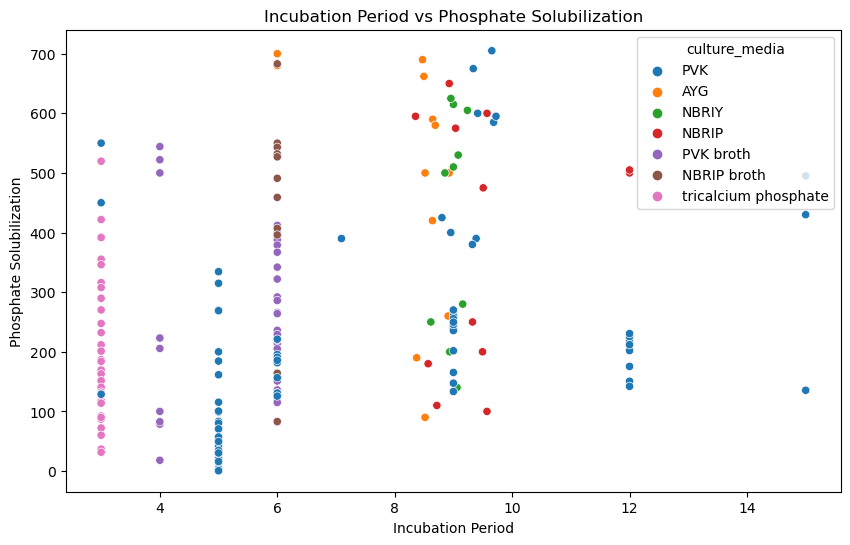

In [27]:
# Plot incubation_period vs phosphate_solubilization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='incubation_period', y='phosphate_solubilization', data=X_imputed, hue=medium)
plt.title('Incubation Period vs Phosphate Solubilization')
plt.xlabel('Incubation Period')
plt.ylabel('Phosphate Solubilization')
plt.show()


/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


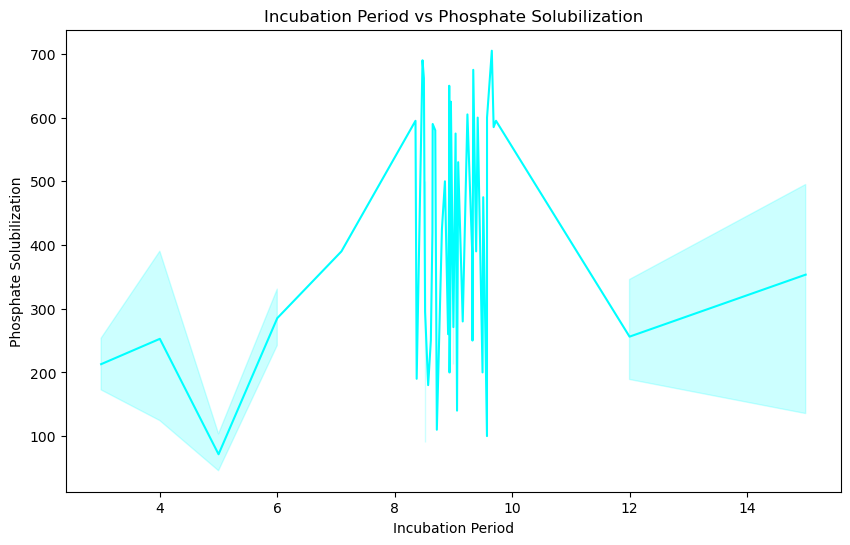

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='incubation_period', y='phosphate_solubilization', data=X_imputed, color='cyan')
plt.title('Incubation Period vs Phosphate Solubilization')
plt.xlabel('Incubation Period')
plt.ylabel('Phosphate Solubilization')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Normalize the data
scaler = StandardScaler()
imputed_array_scaled = scaler.fit_transform(imputed_array)
imputed_array_scaled

array([[ 0.02106314,  0.28070058, -1.55193563, ...,  1.12396155,
         1.94098992,  2.0310096 ],
       [-2.44633286,  0.28070058, -1.44578054, ...,  0.8012739 ,
         1.94098992,  2.0310096 ],
       [-0.59578586,  0.28070058, -1.23347036, ...,  1.00326131,
         1.94098992,  2.0310096 ],
       ...,
       [ 0.02106314,  0.31126012, -0.20730449, ..., -0.13292128,
        -0.51520103, -0.49236596],
       [ 0.02106314,  0.31126012,  0.50039611, ...,  0.98024957,
        -0.51520103, -0.49236596],
       [ 0.02106314,  0.31126012, -0.91500509, ...,  0.98024957,
        -0.51520103, -0.49236596]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imputed_array_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(164, 7)

## Model Building

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression")
print(f"Mean Squared Error: {mse_lr}")
print(f"R^2 Score: {r2_lr}")

Linear Regression
Mean Squared Error: 26725.016214476553
R^2 Score: 0.2700929118670258


In [35]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=250, criterion='squared_error', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regressor")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")


Random Forest Regressor
Mean Squared Error: 14202.849722363617
R^2 Score: 0.6120952518477754


In [36]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("\nXGBoost Regressor")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R^2 Score: {r2_xgb}")


XGBoost Regressor
Mean Squared Error: 15409.22440876006
R^2 Score: 0.5791470422946607


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-07-06 15:58:20.694829: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 15:58:20.698590: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 15:58:20.711585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 15:58:20.737082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 15:58:20.737129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-06 15:58:20.753549: I tensorflow/core/platform/cpu_feature_guard.cc:

In [38]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(1, activation='linear'))

model.summary()

/home/ikraminf/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-06 15:58:22.696527: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(imputed_array_scaled, y, epochs=300, validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 121499.8750 - val_loss: 29575.4629
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 107369.8672 - val_loss: 21899.0645
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69367.9375 - val_loss: 9341.6631
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28881.0312 - val_loss: 9513.0645
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25085.2422 - val_loss: 8918.0596
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22781.1016 - val_loss: 8883.6328
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21234.1855 - val_loss: 8235.1211
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23334.7910 - val_loss: 8516.6992
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18823.1250 - val_loss: 8872.3516
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18887.1133 - val_loss: 9439.6201
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21753.1562 - val_loss: 9524.2764
Epo

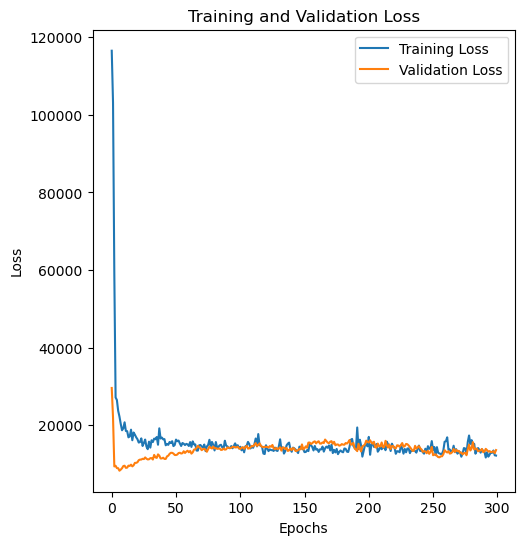

In [40]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

In [41]:
# Predict on the test set
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("\nNeural Network")
print(f"Mean Squared Error: {mse_nn}")
print(f"R^2 Score: {r2_nn}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

Neural Network
Mean Squared Error: 9579.848737291755
R^2 Score: 0.738357520890734
